## NUMPY
ds1_intro_python_numpy.ipynb

In [ ]:
import numpy as np
from functools import reduce
import math
import random



random.seed(9) #random maker default value

returnsRandom = [random.uniform(-0.05, 0.05) for _ in range(100)] # 언더스코어 (_)는 i 대신 관습적 변수



returnsLog = list(map(lambda r: math.log(1 + r), returnsRandom)) 

returnsLogTotal = reduce(lambda x, y: x + y, returnsLog)

returnsLogExp = math.exp(returnsLogTotal) - 1  # 최종 누적 수익률 계산



print(f"로그 수익률의 합계: {returnsLogExp:.4f}")

print(f"단순 합계: {sum(returnsRandom)}")

#로그 수익률의 합계: -0.4177

#단순 합계: -0.4961377838713509

## OPEN API

ds2_open_data

In [1]:
%%writefile src/practice_open_subway_json.py

import os
import requests
import urllib
import mylib

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)

    KEY=str(key['dataseoul'])
    TYPE='json'

    SERVICE='SearchSTNBySubwayLineInfo'
    LINE_NUM=str(2)
    START_INDEX=str(1)
    END_INDEX=str(10)

    params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,'','',LINE_NUM])

    _url='http://openAPI.seoul.go.kr:8088'

    url="/".join([_url,params])

    r=requests.get(url)

    stations=r.json()

    for e in stations['SearchSTNBySubwayLineInfo']['row']: #e means dictionary
        print (u"{0:4s}\t{1:15s}\t{2:3s}\t{3:2s}".format(e['STATION_CD'], e['STATION_NM'], e['FR_CODE'], e['LINE_NUM']))

if __name__ == "__main__":
    doIt()

Writing src/practice_open_subway_json.py


In [9]:
!python src/practice_open_subway_json.py

1804	부천             	148	01호선
1803	역곡             	146	01호선
1726	직산             	P167	01호선
1007	신도림            	140	01호선
1706	안양             	P147	01호선
1719	오산             	P160	01호선
1749	서동탄            	P157-1	01호선
1809	주안             	156	01호선
1910	덕계             	106	01호선
1032	신길             	138	01호선


In [3]:
%%writefile src/practice_open_subway_iter_json.py

#import method
import os
import requests
import urllib
import mylib 

def doIt():
    #bring my key from key.properties
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    
    #make key string
    #define
    KEY=str(key['dataseoul'])
    TYPE='json'
    SERVICE='SearchSTNBySubwayLineInfo'
    LINE_NUM=str(2)
    START_INDEX=str(1)
    END_INDEX=str(10)

    #new define
    startIndex=1
    endIndex=10
    list_total_count=0  

    #while nothing to read
    while True:
        START_INDEX=str(startIndex)
        END_INDEX=str(endIndex)

        params="/".join([KEY,TYPE,SERVICE,START_INDEX,END_INDEX,'','',LINE_NUM])

        _url='http://openAPI.seoul.go.kr:8088'

        url="/".join([_url,params])


        r=requests.get(url)

        stations=r.json()

        if(startIndex==1):
            list_total_count=stations['SearchSTNBySubwayLineInfo']['list_total_count'] #total count 
            print("- Total Count: ", list_total_count)
        if(stations["SearchSTNBySubwayLineInfo"]["RESULT"]["CODE"]=="INFO-000"): #normal value_successful
            for e in stations['SearchSTNBySubwayLineInfo']['row'][::10]:
                print (u"{0:3d}\t{1:4s}\t{2:15s}\t{3:3s}\t{4:2s}".format(
                    startIndex, e['STATION_CD'], e['STATION_NM'], e['FR_CODE'], e['LINE_NUM']
                ))
            startIndex+=10 #next to 10 index
            endIndex+=10
        else:
            print("Error: "+str(startIndex))
        if(endIndex > list_total_count):
            print("----- Ending endIndex=",endIndex)
            break 

if __name__ == "__main__":
    doIt()

Writing src/practice_open_subway_iter_json.py


In [10]:
!python src/practice_open_subway_iter_json.py

- Total Count:  791
  1	1804	부천             	148	01호선
 11	1020	월계             	118	01호선
 21	1713	수원             	P155	01호선
 31	1822	중동             	149	01호선
 41	0159	동묘앞            	127	01호선
 51	1912	지행             	104	01호선
 61	1728	천안             	P169	01호선
 71	1916	소요산            	100	01호선
 81	1907	가능             	109	01호선
 91	1729	당정             	P151	01호선
101	1718	오산대            	P159	01호선
111	0248	양천구청           	234-2	02호선
121	0202	을지로입구          	202	02호선
131	0213	구의             	213	02호선
141	0230	신림             	230	02호선
151	0247	도림천            	234-1	02호선
161	0326	압구정            	336	03호선
171	1954	백석             	313	03호선
181	0340	가락시장           	350	03호선
191	0324	금호             	334	03호선
201	0417	길음             	417	04호선
211	1762	오이도            	456	04호선
221	0412	창동             	412	04호선
231	0411	노원             	411	04호선
241	1453	과천             	438	04호선
251	2547	광나루            	546	05호선
261	2558	오금             	P552	05호선
271	2557	방이             	P551	05호선
281	2519	까치산      

In [6]:
%%writefile src/practice_week3_json.py
import os

import urllib

import requests

import mylib



def doIt():

    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')

    key=mylib.getKey(keyPath)

    

    _url='http://openAPI.seoul.go.kr:8088'

    _key=str(key['dataseoul'])

    _type='json'

    _service='CardSubwayStatsNew'

    _start_index=1

    _end_index=50

    _use_dt='20240701'

    

    _api1="/".join([_url,_key,_type,_service,str(_start_index),str(_end_index),_use_dt])   

    response = requests.get(_api1)

    #print(response.text)

    

    if response.status_code == 200:

        sub = response.json()  # JSON 파싱

    else:

        print("오류:", response.status_code)   

    #print(sub)

    tot_GTON_TNOPE=0

    tot_GTOFF_TNOPE=0

    for e in sub['CardSubwayStatsNew']['row'][::10]:

        print ("{0:5s}\t{1:10s}\t{2:9.1f}\t{3:9.1f}\t{4:10s}".format(e['SBWY_ROUT_LN_NM'],e['SBWY_STNS_NM'],

                                                            e['GTON_TNOPE'],e['GTOFF_TNOPE'],e['REG_YMD']))

        tot_GTON_TNOPE+=e['GTON_TNOPE']

        tot_GTOFF_TNOPE+=e['GTOFF_TNOPE']

    print(f"승차인원합계: {tot_GTON_TNOPE:,} 하차인원합계: {tot_GTOFF_TNOPE:,}");



if __name__ == "__main__":

    doIt()

Writing src/practice_week3_json.py


In [8]:
!python src/practice_week3_json.py

1호선  	서울역       	  55778.0	  52158.0	20240704  
2호선  	시청        	  29542.0	  28262.0	20240704  
2호선  	성수        	  44577.0	  48653.0	20240704  
2호선  	역삼        	  58652.0	  67029.0	20240704  
2호선  	신대방       	  26718.0	  25946.0	20240704  
승차인원합계: 215,267.0 하차인원합계: 222,048.0


## MONGO DB
ds2_open_data

In [21]:
#!python -m pip install "pymongo[srv]"==3.9

     ---------------------------------------- 0.0/701.1 kB ? eta -:--:--
     -------------------------------------- 701.1/701.1 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pymongo: filename=pymongo-3.9.0-cp39-cp39-win_amd64.whl size=345682 sha256=bf5bb3e268467dafebcac528a520ada20e424499b2217f1af3de955093832632
  Stored in directory: c:\users\leeha\appdata\local\pip\cache\wheels\89\e5\ca\534757c0989c05bd540d3fa881f831371417395126e4753198
Successfully built pymongo
  Attempting uninstall: pymongo
    Found existing installation: pymongo 4.9.1
    Uninstalling pymongo-4.9.1:
      Successfully uninstalled pymongo-4.9.1
  Attempting uninstall: dnspython
    Found e

In [22]:
%%writefile src/practice_open_subwayTime.py

import os
import requests
import json
from pymongo import MongoClient
import mylib

def saveJson(_fname,_data):
    import io
    with io.open(_fname, 'a', encoding='utf8') as json_file:
        _j=json.dump(_data, json_file, ensure_ascii=False)
        json_file.write(str(_j)+"\n")

def readJson(_fname):
    for line in open(_fname, 'r').readlines():
        _j=json.loads(line)
        print (_j['id'])

def saveDB(_table, _data):
    _table.insert_one(_data)

#you can fix this define
def readDB(_table):
    for tweet in _table.find():
        print (tweet['id'], tweet['text'])

def saveFile(_fname,_data):
    fp=open(_fname,'a')
    fp.write(_data+"\n")
    fp.close()

def doIt():
    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)

    
    Client = MongoClient()
    _db=Client['ds_open_subwayPassengersDb'] #db created by mongo. You do not have to create this.
    _table=_db['db_open_subwayTable'] #collection
    #db=Client.ds_rest_subwayPassengers
    
    # file name
    _jfname='src/ds_open_subwayTime.json'

    # dataseoul connect
    _key=key['dataseoul'] 
    _url='http://openAPI.seoul.go.kr:8088'
    _type='json'
    _service='CardSubwayTime'
    _start_index=1
    _end_index=5
    _use_mon='202106'
    _maxIter=2   #20 #10번 아닌가..?
    _iter=0
    while _iter<_maxIter:
        _api="/".join([_url,_key,_type,_service,str(_start_index),str(_end_index),_use_mon])
        #print _api
        r=requests.get(_api)
        _json=r.json()
        print (_json)
        saveJson(_jfname,_json)
        saveDB(_table, _json)
        _start_index+=5
        _end_index+=5
        _iter+=1

if __name__ == "__main__":
    doIt()

Overwriting src/practice_open_subwayTime.py


In [23]:
!python src/practice_open_subwayTime.py

{'CardSubwayTime': {'list_total_count': 608, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'USE_MM': '202106', 'SBWY_ROUT_LN_NM': '1호선', 'STTN': '서울역', 'HR_4_GET_ON_NOPE': 654.0, 'HR_4_GET_OFF_NOPE': 17.0, 'HR_5_GET_ON_NOPE': 9008.0, 'HR_5_GET_OFF_NOPE': 6400.0, 'HR_6_GET_ON_NOPE': 12474.0, 'HR_6_GET_OFF_NOPE': 37203.0, 'HR_7_GET_ON_NOPE': 37253.0, 'HR_7_GET_OFF_NOPE': 91875.0, 'HR_8_GET_ON_NOPE': 59876.0, 'HR_8_GET_OFF_NOPE': 187805.0, 'HR_9_GET_ON_NOPE': 44619.0, 'HR_9_GET_OFF_NOPE': 118679.0, 'HR_10_GET_ON_NOPE': 42611.0, 'HR_10_GET_OFF_NOPE': 57710.0, 'HR_11_GET_ON_NOPE': 49533.0, 'HR_11_GET_OFF_NOPE': 50003.0, 'HR_12_GET_ON_NOPE': 59357.0, 'HR_12_GET_OFF_NOPE': 53317.0, 'HR_13_GET_ON_NOPE': 61171.0, 'HR_13_GET_OFF_NOPE': 53687.0, 'HR_14_GET_ON_NOPE': 53310.0, 'HR_14_GET_OFF_NOPE': 49094.0, 'HR_15_GET_ON_NOPE': 65767.0, 'HR_15_GET_OFF_NOPE': 52788.0, 'HR_16_GET_ON_NOPE': 76249.0, 'HR_16_GET_OFF_NOPE': 53969.0, 'HR_17_GET_ON_NOPE': 122928.0, 'HR_17_GET_OFF_NOPE':

In [25]:
%%writefile src/practice_week4.py
import os
import requests
import json
from pymongo import MongoClient
import mylib



def saveDB(_table, _data):

    _table.insert_one(_data)



def sumFindDB(_table):

    cur = _table.find() #cursor를 반환
    for c in cur:
        for e in c['CardSubwayTime']['row']:
            values = e.values() #e의 모든 값을 가져와 values에 저장 (e는 딕셔너리)
            lvalues = list(values) # 리스트로 변환해야 정수인덱싱 가능
            print(f"{e['STTN']}\t{e['JOB_YMD']}\t합계:{sum(lvalues[3:-1])}")


def doIt():

    keyPath=os.path.join(os.getcwd(), 'src', 'key.properties')
    key=mylib.getKey(keyPath)
    
    _key=key['dataseoul'] #KEY='73725.....'
    _url='http://openAPI.seoul.go.kr:8088'
    _type='json'
    _service='CardSubwayTime'
    _start_index=1
    _end_index=5
    _use_mon='202406'
    _maxIter=5   #20
    _iter=0

    while _iter<_maxIter:
        _api="/".join([_url,_key,_type,_service,str(_start_index),str(_end_index),_use_mon])
        r=requests.get(_api)
        _json=r.json()
        print (f"iter:{_iter} 읽은 개수: {len(_json)}")
        saveDB(_table, _json)
        _start_index+=5
        _end_index+=5
        _iter+=1



if __name__ == "__main__":
    Client = MongoClient()
    _db=Client['ds_open_subwayPassengersDb']
    _table=_db['db_open_subwayTable'] #collection

    doIt()

    sumFindDB(_table)

Writing src/practice_week4.py


In [26]:
!python src/practice_week4.py

iter:0 읽은 개수: 1
iter:1 읽은 개수: 1
iter:2 읽은 개수: 1
iter:3 읽은 개수: 1
iter:4 읽은 개수: 1
서울역	20210703	합계:2236519.0
동묘앞	20210703	합계:534816.0
시청	20210703	합계:1079521.0
종각	20210703	합계:1741067.0
종로3가	20210703	합계:1309928.0
종로5가	20210703	합계:1195338.0
동대문	20210703	합계:629519.0
신설동	20210703	합계:729351.0
제기동	20210703	합계:930054.0
청량리(서울시립대입구)	20210703	합계:1108680.0
서울역	20210703	합계:2236519.0
동묘앞	20210703	합계:534816.0
시청	20210703	합계:1079521.0
종각	20210703	합계:1741067.0
종로3가	20210703	합계:1309928.0
종로5가	20210703	합계:1195338.0
동대문	20210703	합계:629519.0
신설동	20210703	합계:729351.0
제기동	20210703	합계:930054.0
청량리(서울시립대입구)	20210703	합계:1108680.0
서울역	20210703	합계:2236519.0
동묘앞	20210703	합계:534816.0
시청	20210703	합계:1079521.0
종각	20210703	합계:1741067.0
종로3가	20210703	합계:1309928.0
종로5가	20210703	합계:1195338.0
동대문	20210703	합계:629519.0
신설동	20210703	합계:729351.0
제기동	20210703	합계:930054.0
청량리(서울시립대입구)	20210703	합계:1108680.0
서울역	20210703	합계:2236519.0
동묘앞	20210703	합계:534816.0
시청	20210703	합계:1079521.0
종각	20210703	합계:1741067.0
종로3가	20210703	합계:1309928

## STOCK
ds3_stockQuant.ipynb

[*********************100%***********************]  1 of 1 completed


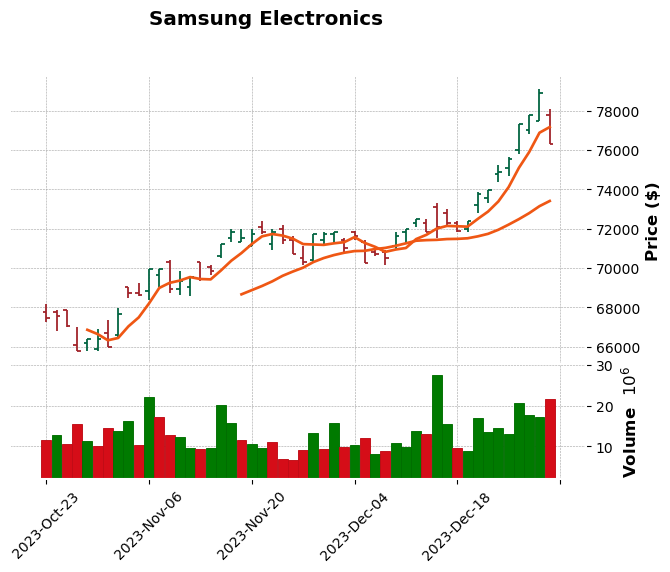

In [54]:
import yfinance as yf
import mplfinance as mpf


ticker = yf.Ticker("005930.KS") #samsung
sse = '005930.KS'  #   삼성전자
start = '2020-01-01' # datetime.datetime(2020,1,1) (import datetime)
end = '2023-12-31' # datetime.datetime(2023,12,31)

sse1 = ticker.history(interval='1d', period='1y') #1년간 매일 OHLCV 나타냄
sse2 = yf.download(sse, start=start, end=end) #데이터 프레임

mpf.plot(sse1[:50],
         type='ohlc', #candle,
         style = 'charles',
         volume = True,
         mav=(5,20),
         title="Samsung Electronics", #한글출력은 한글폰트 필요
         ylabel='Price ($)'
)

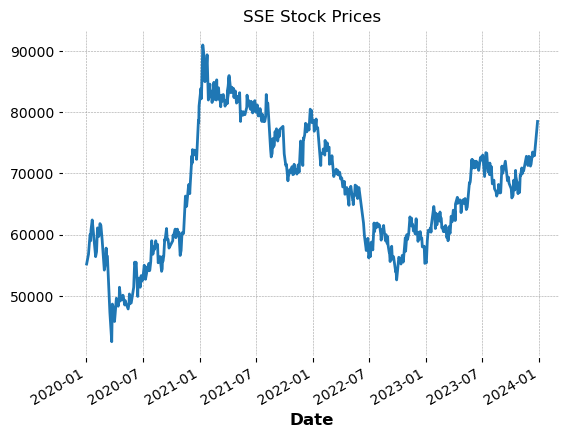

In [58]:
import matplotlib.pyplot as plt

sse2['Close'].plot()
plt.title("SSE Stock Prices")
plt.show()

In [59]:
import yfinance as yf

tickerSse = yf.Ticker("005930.KS")
currentPriceSse = tickerSse.history(period="1d")['Close'].iloc[-1] # 직전일 주가
financialsSse = tickerSse.financials.transpose()  # 데이터가 열 기준으로 되어있으니 행을 기준으로 바꿔준다

sharesOutstanding = tickerSse.info['sharesOutstanding'] # 발행주식수 tickerSse.info에서 가져온다.
netIncome = financialsSse['Net Income'].iloc[0] # financialsSse['Net Income'].iloc[0:4].sum() 4년치 합계

# yfinance에서 순자산은 'totalAssets'에서 'totalLiab'를 빼서 계산.
totalAssets = tickerSse.balance_sheet.loc['Total Assets'].iloc[0]
totalLiabilities = tickerSse.balance_sheet.loc['Total Liabilities Net Minority Interest'].iloc[0]
netAsset = totalAssets - totalLiabilities

eps = netIncome / sharesOutstanding
per = currentPriceSse / eps
bvps = netAsset / sharesOutstanding
pbr = currentPriceSse / bvps

print(f"삼성전자의 현재 주가: {currentPriceSse:.2f}원")
print(f"삼성전자의 EPS: {eps:.2f}원")
print(f"삼성전자의 Basic EPS: {financialsSse['Basic EPS'].iloc[0]:.2f}원")
print(f"삼성전자의 PER: {per:.2f}")
print(f"삼성전자의 PBR: {pbr:.2f}")

삼성전자의 현재 주가: 57700.00원
삼성전자의 EPS: 2424.44원
삼성전자의 Basic EPS: 2131.00원
삼성전자의 PER: 23.80
삼성전자의 PBR: 0.95


In [60]:
from pykrx import stock
sseFundamentals202408 = stock.get_market_fundamental_by_date(fromdate="20240801", todate="20240815", ticker="005930")
sseFundamentals202408.head()

BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2024-08-01  52002  39.00  1.60  2131  1.74  1444
2024-08-02  52002  37.35  1.53  2131  1.81  1444
2024-08-05  52002  33.51  1.37  2131  2.02  1444
2024-08-06  52002  34.02  1.39  2131  1.99  1444
2024-08-07  52002  35.05  1.44  2131  1.93  1444

[*********************100%***********************]  1 of 1 completed


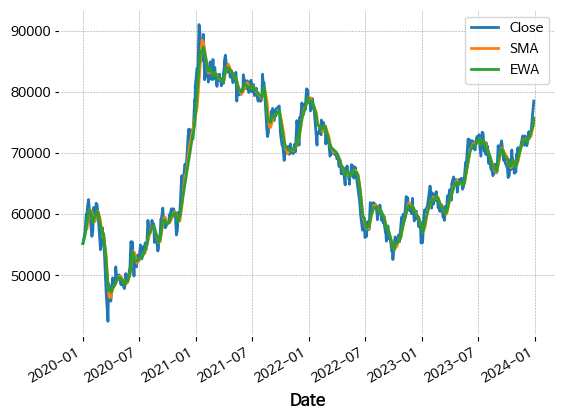

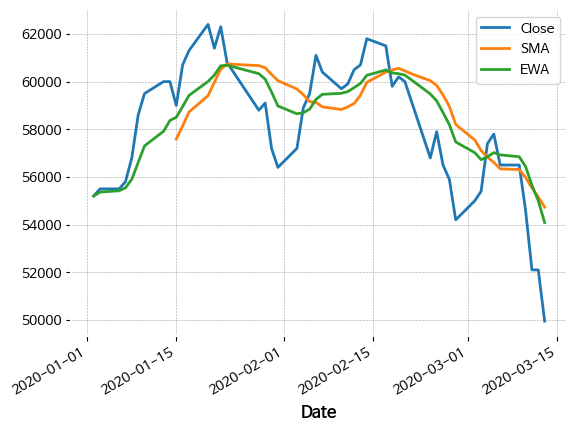

In [62]:
sse2 = yf.download('005930.KS', start = '2020-01-01', end = '2023-12-31')
_dfSse2 = sse2.copy()
_dfSse2['SMA'] = _dfSse2.Close.rolling(10).mean()
_dfSse2['EWA'] = _dfSse2['Close'].ewm(span=10).mean()
_dfSse2[['Close', 'SMA', 'EWA']].plot()
_dfSse2[['Close', 'SMA', 'EWA']][:50].plot()

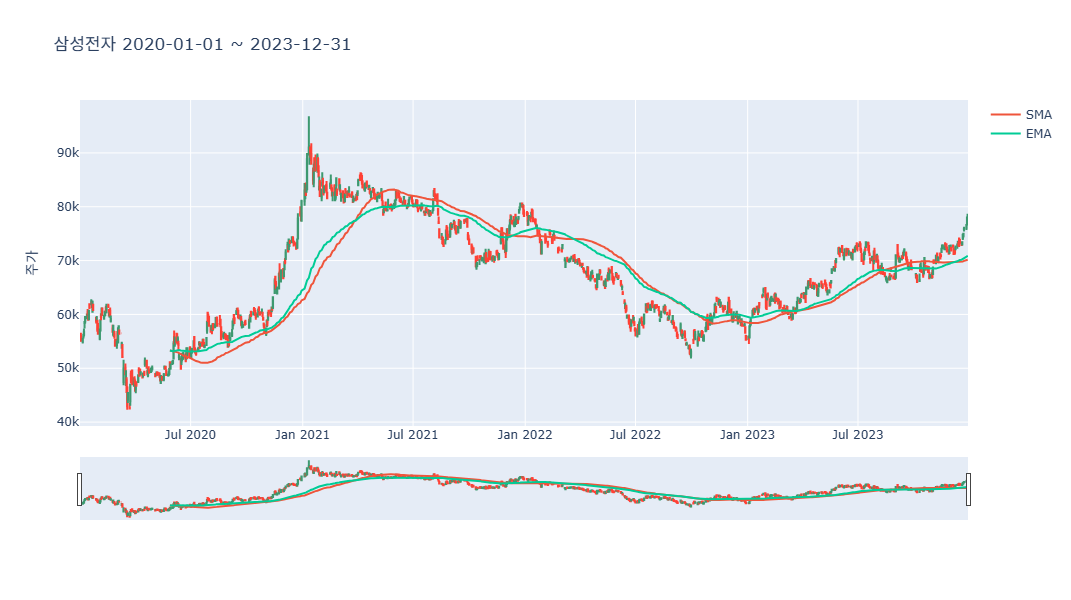

In [64]:
import plotly.graph_objects as go
import pandas_ta as ta

candlestick = go.Candlestick(
                            x=sse2.index,
                            open=sse2['Open'],
                            high=sse2['High'],
                            low=sse2['Low'],
                            close=sse2['Close'],
                            showlegend=False
                            )

sse2['SMA'] = ta.sma(sse2['Close'], length=100)
sse2['EMA'] = ta.ema(sse2['Close'], length=100)
sma = go.Scatter(x=sse2.index,
                 y=sse2["SMA"],
                 yaxis="y1",
                 name="SMA"
                )
ema = go.Scatter(x=sse2.index,
                 y=sse2["EMA"],
                 name="EMA"
                )
fig = go.Figure(data=[candlestick, sma, ema])

fig.update_layout(
    width=800, height=600,
    title="삼성전자 2020-01-01 ~ 2023-12-31",
    yaxis_title='주가',
)

fig.show()

In [66]:
#!pip install backtesting

  Using cached Backtesting-0.3.3-py3-none-any.whl
  Using cached bokeh-3.4.3-py3-none-any.whl.metadata (12 kB)
Using cached bokeh-3.4.3-py3-none-any.whl (7.0 MB)


In [67]:
from backtesting import Backtest, Strategy #첫글자 대문자 - class, 
from backtesting.lib import crossover #이동평균 돌파할 때 크로스오버
from backtesting.test import SMA,GOOG #SMA_단순이동변경(pandas ta로도 가능), GOOG_구글 데이터 이용(안 써도 괜찮음)

class SmaCross(Strategy): #괄호 안에 부모 
    n1=20
    n2=50

    def init(self): #self_자기 객체 넣겠다
        close=self.data.Close #close는 로컬 변수(init 벗어나면 없어짐)
        self.ma1=self.I(SMA,close,self.n1) #self.ma1은 멤버 변수 / 함수명, 인자 2개 -> n1
        self.ma2=self.I(SMA,close,self.n2)

    def next(self):
        if crossover(self.ma1,self.ma2):
            print(f"[+매수] 일자:{self.data.df.index[-1]} 직전 보유: {self.position.size} 종가: {self.data.Close[-1]}"\
                    f"\t보유자금: {self.equity:.1f}")
            self.buy() #기본값 1, 전량

        elif crossover(self.ma2,self.ma1):
            print(f"[-매도] 일자: {self.data.df.index[-1]} 직전 보유: {self.position.size} 종가: {self.data.Close[-1]}")
            self.sell()

bt=Backtest(_dfSse2,SmaCross,commission=.002, cash=1000000, exclusive_orders=True)
stats=bt.run()
print(stats)
bt.plot()    


C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:50: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.



Loading BokehJS ...

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



[+매수] 일자:2020-05-19 00:00:00 직전 보유: 0 종가: 50300.0	보유자금: 1000000.0
[-매도] 일자: 2021-03-04 00:00:00 직전 보유: 19 종가: 82400.0
[+매수] 일자:2021-04-12 00:00:00 직전 보유: -19 종가: 83200.0	보유자금: 1546018.2
[-매도] 일자: 2021-05-12 00:00:00 직전 보유: 18 종가: 80000.0
[+매수] 일자:2021-12-02 00:00:00 직전 보유: -18 종가: 75800.0	보유자금: 1525989.8
[-매도] 일자: 2022-02-03 00:00:00 직전 보유: 20 종가: 73300.0
[+매수] 일자:2022-08-09 00:00:00 직전 보유: -20 종가: 60000.0	보유자금: 1783593.8
[-매도] 일자: 2022-09-05 00:00:00 직전 보유: 30 종가: 57100.0
[+매수] 일자:2022-11-02 00:00:00 직전 보유: -30 종가: 59600.0	보유자금: 1675627.8
[-매도] 일자: 2022-12-26 00:00:00 직전 보유: 29 종가: 57900.0
[+매수] 일자:2023-01-30 00:00:00 직전 보유: -29 종가: 63300.0	보유자금: 1527765.0
[-매도] 일자: 2023-03-15 00:00:00 직전 보유: 23 종가: 59800.0
[+매수] 일자:2023-04-07 00:00:00 직전 보유: -24 종가: 65000.0	보유자금: 1278102.4
[-매도] 일자: 2023-08-01 00:00:00 직전 보유: 19 종가: 71100.0
[+매수] 일자:2023-09-20 00:00:00 직전 보유: -19 종가: 69600.0	보유자금: 1410753.4
[-매도] 일자: 2023-10-20 00:00:00 직전 보유: 20 종가: 68800.0
[+매수] 일자:2023-11-13 00:00:00 직전 보유: -20 종가

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1330', ...)

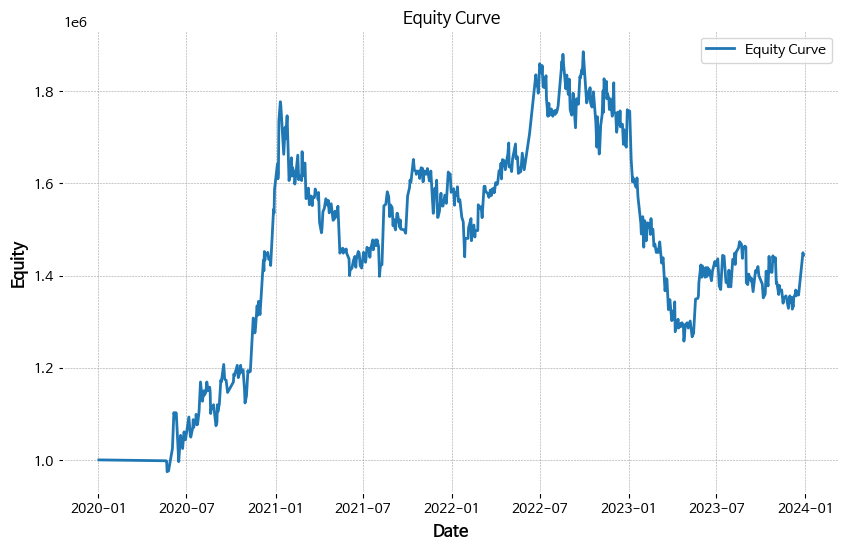

"\nplt.figure(figsize=(10, 6))\nplt.plot(stats['_equity_curve'].index, stats['_equity_curve']['Equity'], label='Equity Curve')\nplt.title('Equity Curve')\nplt.xlabel('Date')\nplt.ylabel('Equity')\nplt.legend()\nplt.plot()\n"

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(stats['_equity_curve'].index.values, stats['_equity_curve']['Equity'].values, label='Equity Curve')
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
plt.show()  # plt.plot() 대신 plt.show() 사용

"""
plt.figure(figsize=(10, 6))
plt.plot(stats['_equity_curve'].index, stats['_equity_curve']['Equity'], label='Equity Curve')
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
plt.plot()
"""

In [69]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import pandas_ta as ta
 
class SmaCross(Strategy):
    n1 = 30 #20
    n2 = 200 #50
    def init(self):
        # numpy.array 대신 pandas.Series를 반환하기 때문에 --> 오류
        #self.sma10 = self.I(ta.sma, self.data.Close, self.n1)
        #self.sma20 = self.I(ta.sma, self.data.Close, self.n2)
        # pandas_ta에서 계산한 이동평균을 numpy 배열로 변환 --> 오류
        #self.sma10 = self.I(lambda x: ta.sma(x, self.n1).to_numpy(), self.data.Close)
        #self.sma20 = self.I(lambda x: ta.sma(x, self.n2).to_numpy(), self.data.Close)
        # 이동 평균 계산을 직접 수행하여 numpy 배열로 변환
        self.sma10 = self.I(lambda x: pd.Series(x).rolling(self.n1).mean().to_numpy(), self.data.Close)
        self.sma20 = self.I(lambda x: pd.Series(x).rolling(self.n2).mean().to_numpy(), self.data.Close)

    def next(self):
        #if crossover(self.data.sma10, self.data.sma20):
        if crossover(self.sma10, self.sma20):
            self.buy()
        #elif crossover(self.data.sma20, self.data.sma10):
        elif crossover(self.sma20, self.sma10):
            self.sell()

#cash는 정수 소수 모두 가능하고 컴마없이 적는다. commission은 퍼센트를 적지 않는다. .015는 1.5% 
bt = Backtest(_dfSse2, SmaCross, cash=1000000, commission=.015, exclusive_orders=True)

#여기 중요(아까랑 변동)
#output = bt.run()
output = bt.optimize(n1=range(5,60,5), #n1=12
                     n2=range(50,200,5), #n2=30
                     maximize='Return [%]', 
                     #maximize='Equity Final [$]',
                     constraint=lambda param: param.n1 < param.n2)
print(output)
bt.plot(filename=f'scripts/tearsheet.html', plot_drawdown=True, open_browser=False)

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\backtesting.py:1488: UserWarning:

Searching for best of 327 configurations.



  0%|          | 0/9 [00:00<?, ?it/s]

Start                     2020-01-02 00:00:00
End                       2023-12-28 00:00:00
Duration                   1456 days 00:00:00
Exposure Time [%]                   88.121827
Equity Final [$]                    2176769.5
Equity Peak [$]                     2185169.5
Return [%]                          117.67695
Buy & Hold Return [%]               42.210145
Return (Ann.) [%]                    22.01834
Volatility (Ann.) [%]               25.690811
Sharpe Ratio                         0.857051
Sortino Ratio                        1.623792
Calmar Ratio                         0.949705
Max. Drawdown [%]                  -23.184387
Avg. Drawdown [%]                    -3.99039
Max. Drawdown Duration      544 days 00:00:00
Avg. Drawdown Duration       42 days 00:00:00
# Trades                                   13
Win Rate [%]                        76.923077
Best Trade [%]                      57.635468
Worst Trade [%]                    -12.230252
Avg. Trade [%]                    

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1737', ...)

In [70]:
print("최적화된 매개변수 조합:", output._strategy)

최적화된 매개변수 조합: SmaCross(n1=55,n2=75)


In [71]:
import datetime
import pandas_ta as ta
import pandas as pd

from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover

class RsiOscillator(Strategy):

    upper_bound = 70 # 70이상이면 과매수
    lower_bound = 30 # 30이하이면 과매도
    rsi_window = 14 # 이전 14개 데이터항목을 기준으로 계산한다.

    def init(self):
        self.rsi = self.I(ta.rsi, pd.Series(self.data.Close), self.rsi_window) #series로 줘야됨

    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close() #self.close() -> Error
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

bt = Backtest(_dfSse2, RsiOscillator, cash=1000000, commission=.002)
stats = bt.run()
statsOpt = bt.optimize(
        upper_bound = range(50,85,5),
        lower_bound = range(15,45,5),
        rsi_window = range(10,30,2),
        maximize='Equity Final [$]')
bt.plot()

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\backtesting.py:1488: UserWarning:

Searching for best of 420 configurations.



  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:455: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

C:\Users\leeha\Code\202210870_data\env3.9\lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p2126', ...)

In [72]:
print("최적화된 매개변수 조합:", statsOpt._strategy)

최적화된 매개변수 조합: RsiOscillator(upper_bound=80,lower_bound=25,rsi_window=22)
